# Modelo de Ising en 3D

Autor: David Duran<br>
Año: 2023

In [9]:
# Importar paquetes
import numpy as np
import matplotlib.pyplot as plt
import numba
from numba import njit

In [10]:
# Lattice
tamaño_red = 20

# Red tridimensional
rejilla = np.random.choice([-1, 1], size=(tamaño_red, tamaño_red, tamaño_red))

In [11]:
# Algoritmo de Metropolis para la red 3D
@numba.njit("UniTuple(f8[:], 2)(i8[:,:,:], i8, f8, f8)", nogil=True)
def metropolis(rejilla, pasos, BJ, energia):
    # Copiar la rejilla para no modificar la original
    rejilla = rejilla.copy()

    # Crear arreglos para almacenar la magnetización y la energía
    magnetizacion = np.zeros(pasos - 1)
    energia_total = np.zeros(pasos - 1)

    # Bucle para actualizar la rejilla (loop to update the lattice)
    for t in range(0, pasos - 1):
        # Seleccionar un punto aleatorio en la rejilla y cambiar el spin
        x = np.random.randint(0, tamaño_red)
        y = np.random.randint(0, tamaño_red)
        z = np.random.randint(0, tamaño_red)

        spin_inicial = rejilla[x, y, z]
        spin_propuesto = spin_inicial * -1

        # Calcular el cambio de energía
        energia_inicial = 0
        energia_final = 0
        vecinos = [
            (x - 1, y, z), (x + 1, y, z),
            (x, y - 1, z), (x, y + 1, z),
            (x, y, z - 1), (x, y, z + 1)
        ]
        for nx, ny, nz in vecinos:
            if 0 <= nx < tamaño_red and 0 <= ny < tamaño_red and 0 <= nz < tamaño_red:
                energia_inicial += -spin_inicial * rejilla[nx, ny, nz]
                energia_final += -spin_propuesto * rejilla[nx, ny, nz]

        # Actualizar el estado con las probabilidades designadas
        delta_energia = energia_final - energia_inicial
        if (delta_energia > 0) * (np.random.random() < np.exp(-BJ * delta_energia)):
            rejilla[x, y, z] = spin_propuesto
            energia += delta_energia
        elif delta_energia <= 0:
            rejilla[x, y, z] = spin_propuesto
            energia += delta_energia

        # Actualizar la magnetización y la energía total
        magnetizacion[t] = rejilla.sum()
        energia_total[t] = energia

    return magnetizacion, energia_total

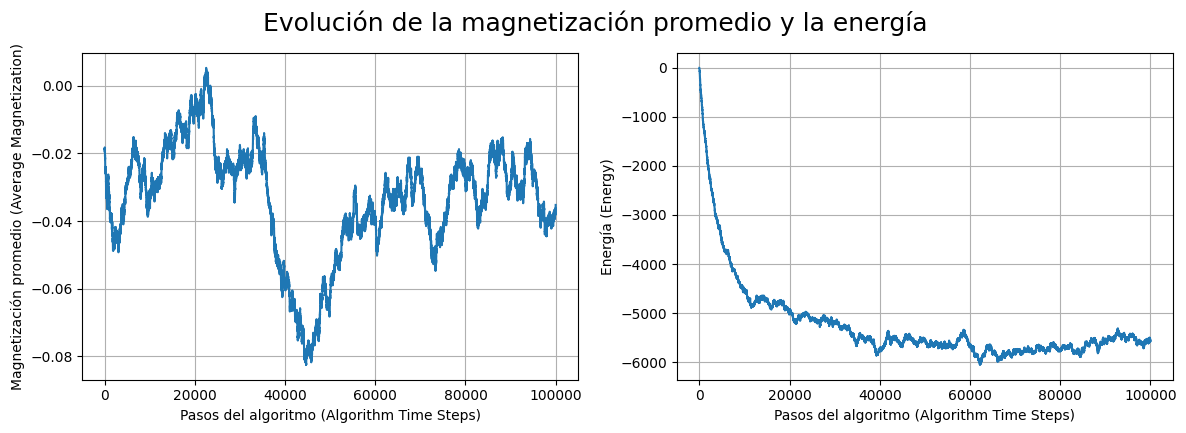

In [12]:
# Ejecutar la simulación
magnetizacion, energia_total = metropolis(rejilla, 100000, 0.2, 0)

# Graficar la magnetización y la energía total
fig, ejes = plt.subplots(1, 2, figsize=(12, 4))
eje = ejes[0]
eje.plot(magnetizacion / tamaño_red ** 3)
eje.set_xlabel('Pasos del algoritmo')
eje.set_ylabel('Magnetización promedio')
eje.grid()

eje = ejes[1]
eje.plot(energia_total)
eje.set_xlabel('Pasos del algoritmo')
eje.set_ylabel('Energía')
eje.grid()

fig.tight_layout()
fig.suptitle('Evolución de la magnetización promedio y la energía', y=1.07, size=18)
plt.show()

In [13]:
!pip install mayavi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 47.8 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.2/229.2 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.9/268.9 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 36.3 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 68.9 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 41.9 MB/s eta 0:00:00:00:01
  Using cached vtk-9.2.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (79.3 MB)
  Created wheel for mayavi: filename=mayavi-4.8.1-cp310-cp310-linux_x86_64.whl size=16175545 sha256=4d03ea7b5509ba715a6f4a894d57be1e839bf32c21fa94c92c6148c1e7056805
  Stored in directory: /home/codespace/.cache/pip/wheels/c2/6b/23/49aa8ae5063a76fbc35ce90e74f8361c

In [14]:
import numpy as np
from mayavi import mlab

def visualize_spins(lattice):
    mlab.figure(bgcolor=(1, 1, 1))

    for i in range(lattice.shape[0]):
        for j in range(lattice.shape[1]):
            for k in range(lattice.shape[2]):
                spin = lattice[i, j, k]
                color = (0, 0, 1) if spin == 1 else (1, 0, 0)
                mlab.quiver3d(i, j, k, 0, 0, spin, color=color, mode='arrow', scale_factor=0.5)

    mlab.show()

visualize_spins(rejilla)

ImportError: Could not import backend for traitsui.  Make sure you
        have a suitable UI toolkit like PyQt/PySide or wxPython
        installed.

In [ ]:
def simulate_and_visualize(rejilla, pasos, BJ, energia, visualization_interval=1000):
    for _ in range(pasos // visualization_interval):
        magnetizacion, energia_total = metropolis(rejilla, visualization_interval, BJ, energia)
        visualize_spins(rejilla)

simulate_and_visualize(rejilla, 100000, 0.2, 0, visualization_interval=1000)